In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold

import matplotlib.style as mplstyle
mplstyle.use(['ggplot', 'fast'])

# plt.rcParams.update({
#     "text.usetex": True,       
#     "font.family": "serif",    
#     "font.size": 10, 
# })


# For reproducibility
np.random.seed(2018)
seed = np.random.seed(2018)

In [20]:
# --- General functions ---

def f_true(x): 
    '''
    Return 1D Runge function
    '''  
    return 1.0 / (1.0 + 25.0 * x**2)  # Runge-lignende funksjon

def make_data(n, seed=seed):     
    '''
    Makes a data set of length n over the Runge function
    for x in (-1, 1).

    Creates train and test data sets
    '''
    x = np.linspace(-1, 1, n)   

    y_clean = f_true(x)    
    y = y_clean + np.random.normal(0, 0.1, n)

    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.2, random_state=seed, shuffle=True
    )

    train = (x_train, y_train)
    test  = (x_test, y_test)
    full  = (x, y, y_clean)
    return train, test, full

In [21]:
n = 2000
p_vals = np.arange(2, 100, 5)

In [22]:
def OLS_various_poly_deg(n, p_vals):
    results = []

    train, test, full = make_data(n)  # making a dataset with size n
    x_train, y_train = train  # training data
    x_test, y_test = test  # test data
    x_all, y_all, y_all_clean = full  # actual data

    x_train = x_train.reshape(-1, 1)
    x_test = x_test.reshape(-1, 1)
    x_all = x_all.reshape(-1, 1)

    # making an OLS model for a given polynomial degree, p
    for p in p_vals:
        model = make_pipeline(
        PolynomialFeatures(degree=p, include_bias=True),
        StandardScaler(with_mean=False),
        LinearRegression(fit_intercept=False)
        )
        
        # using the training data to train the model
        model.fit(x_train, y_train)

        # using the test data to make a prediction, unsee data for the model
        y_pred_test = model.predict(x_test)
        y_pred_train = model.predict(x_train)
        
        # assessing the model with scores
        mse_test = mean_squared_error(y_test, y_pred_test)
        r2_test = r2_score(y_test, y_pred_test)

        mse_train = mean_squared_error(y_train, y_pred_train)
        r2_train = r2_score(y_train, y_pred_train)


        # extracting the model features
        theta = model.named_steps['linearregression'].coef_
        
        # saving the results in a pandas dataframe
        results.append({
            'p': p,
            'theta': theta,
            'MSE_test': mse_test,
            'R2_test': r2_test,
            'MSE_train': mse_train,
            'R2_train': r2_train,
            'y_pred_test': y_pred_test,
            'y_pred_train': y_pred_train,
            'y_test': y_test,
            'y_train': y_train,
            'y_all': y_all,
            'x_test': x_test,
            'x_train': x_train,
            'x_all': x_all
            })

    df_OLS = pd.DataFrame(results)

    return df_OLS

In [23]:
def plot_OLS_results(df_OLS, p):
    """
    Plot the OLS results for a specific number of datapoints 'n' and polynomial degree `p`.
    """
    row = df_OLS[(df_OLS['p'] == p)].iloc[0]

    x_train = row['x_train']
    y_train = row['y_train']
    x_test = row['x_test']
    y_test = row['y_test']
    x_all = row['x_all']
    y_all = row['y_all']
    y_pred_test = row['y_pred_test']
    y_pred_train = row['y_pred_train']

    plt.figure(figsize=(8, 5))

    # Plot actual data
    plt.scatter(x_all, y_all, s=6, label='Actual data')

    # Plot training data
    plt.scatter(x_train, y_train, s=6, label='Training data')

    # Plot test data
    plt.scatter(x_test, y_test, s=6, label='Test data')

    # Plot model prediction on test data
    plt.scatter(x_test, y_pred_test, s=6, label='Predicted (test)')

    # Plot model prediction on test data
    plt.scatter(x_train, y_pred_train, s=6, label='Predicted (train)')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'OLS Polynomial Regression (n={n}, p={p})')
    plt.legend()
    plt.show()

In [24]:
df_OLS_degs = OLS_various_poly_deg(n, p_vals)

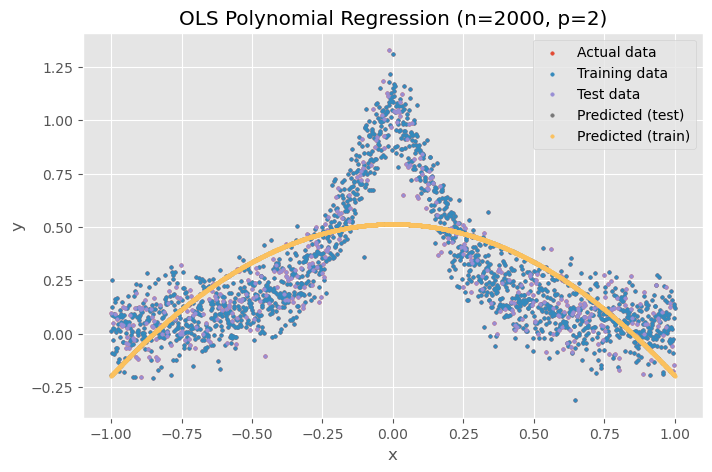

In [25]:
plot_OLS_results(df_OLS_degs, p_vals[0])

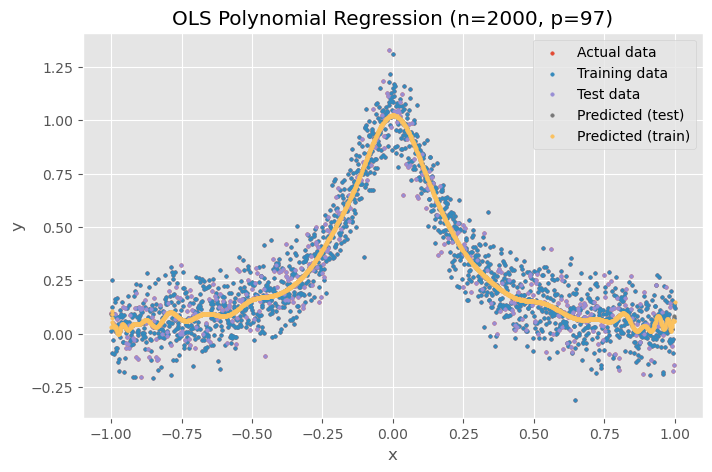

In [26]:
plot_OLS_results(df_OLS_degs, p_vals[-1])

Text(0.5, 0.98, 'OLS \n n = 2000')

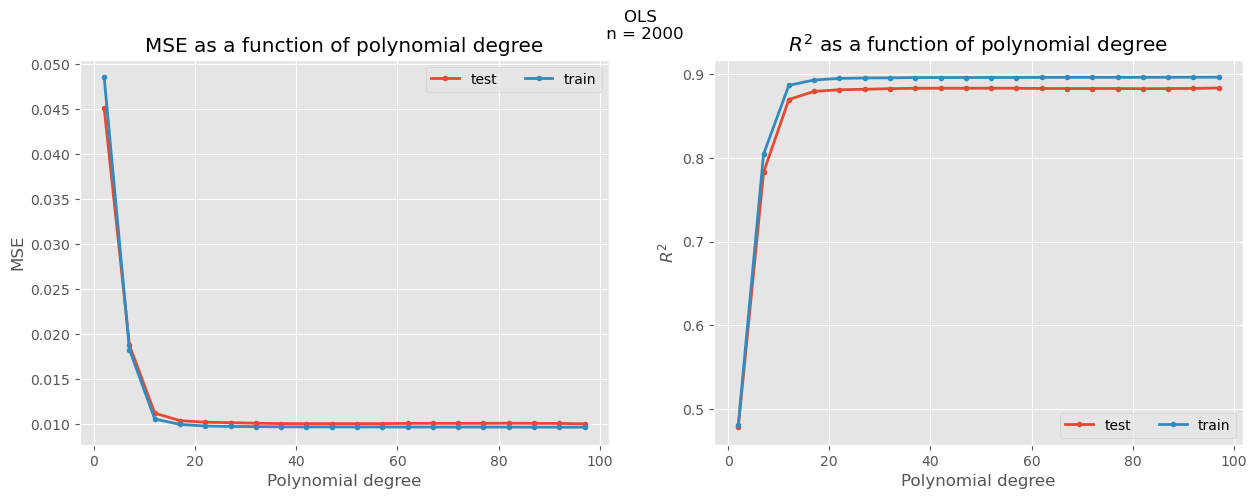

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(df_OLS_degs['p'], df_OLS_degs['MSE_test'], marker='o', markersize='3', linewidth='2', label='test')
ax[0].plot(df_OLS_degs['p'], df_OLS_degs['MSE_train'], marker='o', markersize='3', linewidth='2', label='train')


ax[0].set_title('MSE as a function of polynomial degree')
ax[0].legend(loc='upper right', ncol=2)
ax[0].set_xlabel('Polynomial degree')
ax[0].set_ylabel('MSE')

ax[1].plot(df_OLS_degs['p'], df_OLS_degs['R2_test'], marker='o', markersize='3', linewidth='2', label=f'test')
ax[1].plot(df_OLS_degs['p'], df_OLS_degs['R2_train'], marker='o', markersize='3', linewidth='2', label=f'train')

ax[1].set_title(r'$R^2$ as a function of polynomial degree')
ax[1].legend(loc='lower right', ncol=2)
ax[1].set_xlabel('Polynomial degree')
ax[1].set_ylabel(r'$R^2$')

fig.suptitle(f'OLS \n n = {n}')

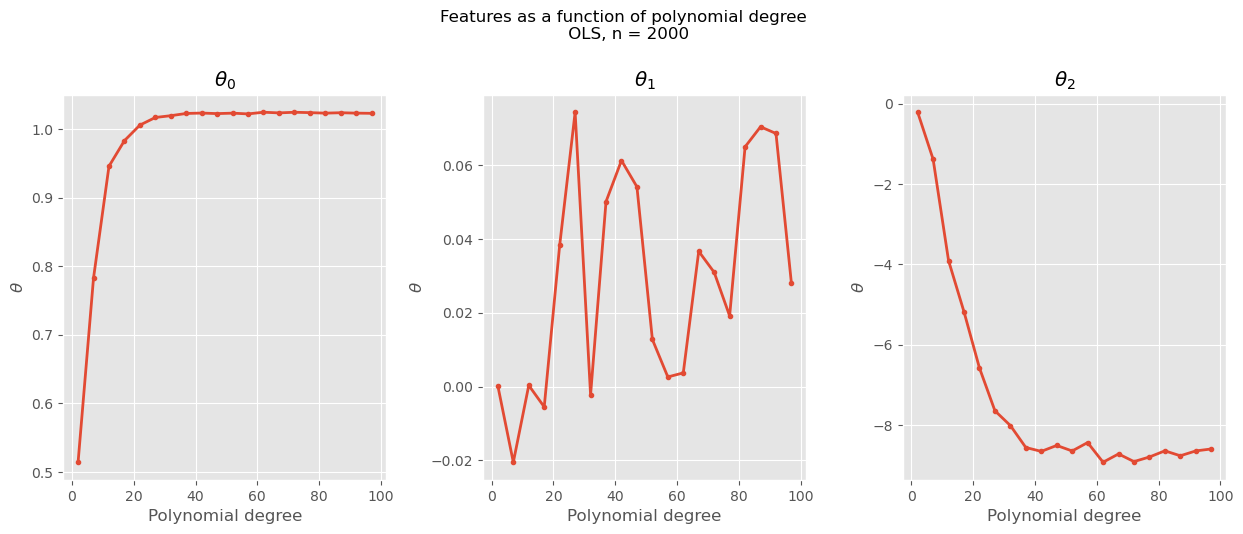

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
plt.subplots_adjust(wspace=0.3)

ax[0].plot(df_OLS_degs['p'], df_OLS_degs['theta'].apply(lambda x: x[0]), marker='o', markersize='3', linewidth='2')
ax[1].plot(df_OLS_degs['p'], df_OLS_degs['theta'].apply(lambda x: x[1]), marker='o', markersize='3', linewidth='2')
ax[2].plot(df_OLS_degs['p'], df_OLS_degs['theta'].apply(lambda x: x[2]), marker='o', markersize='3', linewidth='2')

ax[0].set_title(r'$\theta_0$')
ax[1].set_title(r'$\theta_1$')
ax[2].set_title(r'$\theta_2$')

fig.suptitle(f'Features as a function of polynomial degree \n OLS, n = {n}', y=1.05)

for axs in ax:
    axs.set_xlabel('Polynomial degree')
    axs.set_ylabel(r'$\theta$')

# Dependence on data points

In [29]:
def OLS_various_n_data(p, n_vals):
    results = []

    for n in n_vals:
        train, test, full = make_data(n)  # making a dataset with size n
        x_train, y_train = train  # training data
        x_test, y_test = test  # test data
        x_all, y_all, y_all_clean = full  # actual data

        x_train = x_train.reshape(-1, 1)
        x_test = x_test.reshape(-1, 1)
        x_all = x_all.reshape(-1, 1)

        # making an OLS model for a given polynomial degree, p
        model = make_pipeline(
        PolynomialFeatures(degree=p, include_bias=True),
        StandardScaler(with_mean=False),
        LinearRegression(fit_intercept=False)
        )
        
        # using the training data to train the model
        model.fit(x_train, y_train)

        # using the test data to make a prediction, unsee data for the model
        y_pred_test = model.predict(x_test)
        y_pred_train = model.predict(x_train)
        
        # assessing the model with scores
        mse_test = mean_squared_error(y_test, y_pred_test)
        r2_test = r2_score(y_test, y_pred_test)

        mse_train = mean_squared_error(y_train, y_pred_train)
        r2_train = r2_score(y_train, y_pred_train)


        # extracting the model features
        theta = model.named_steps['linearregression'].coef_
        
        # saving the results in a pandas dataframe
        results.append({
            'n': n,
            'theta': theta,
            'MSE_test': mse_test,
            'R2_test': r2_test,
            'MSE_train': mse_train,
            'R2_train': r2_train,
            'y_pred_test': y_pred_test,
            'y_pred_train': y_pred_train,
            'y_test': y_test,
            'y_train': y_train,
            'y_all': y_all,
            'x_test': x_test,
            'x_train': x_train,
            'x_all': x_all
            })

    df_OLS = pd.DataFrame(results)

    return df_OLS

In [30]:
p = 10

In [31]:
n_vals = np.arange(10, 100, 10)

In [32]:
df_OLS_n_low = OLS_various_n_data(p, n_vals)

In [33]:
n_vals = np.arange(500, 10000, 50)

In [34]:
df_OLS_n_high = OLS_various_n_data(p, n_vals)

Text(0.5, 0.98, 'OLS \n Polynomial degree = 10')

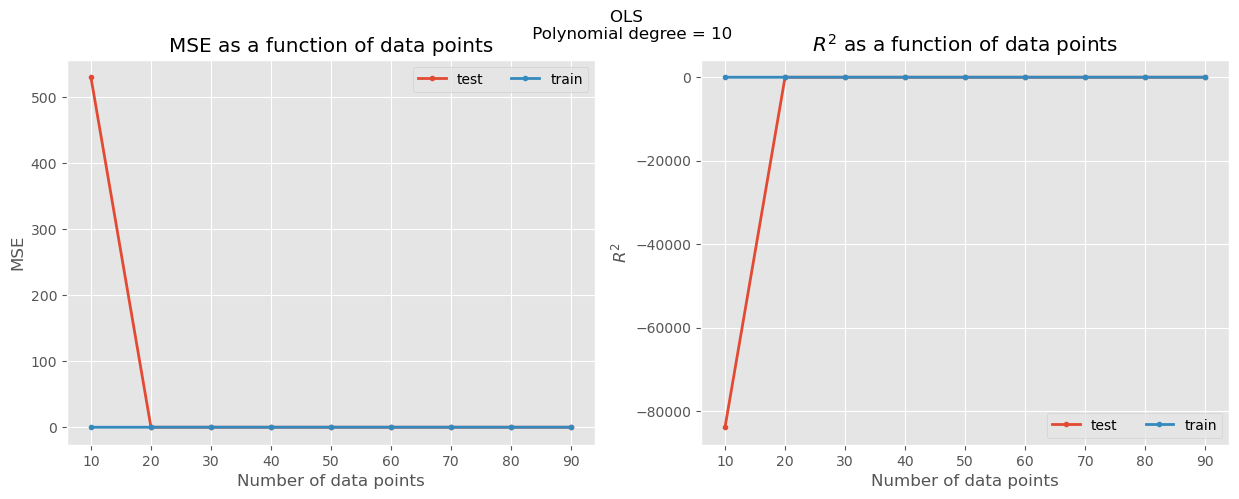

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(df_OLS_n_low['n'], df_OLS_n_low['MSE_test'], marker='o', markersize='3', linewidth='2', label='test')
ax[0].plot(df_OLS_n_low['n'], df_OLS_n_low['MSE_train'], marker='o', markersize='3', linewidth='2', label='train')


ax[0].set_title('MSE as a function of data points')
ax[0].legend(loc='upper right', ncol=2)
ax[0].set_xlabel('Number of data points')
ax[0].set_ylabel('MSE')

ax[1].plot(df_OLS_n_low['n'], df_OLS_n_low['R2_test'], marker='o', markersize='3', linewidth='2', label=f'test')
ax[1].plot(df_OLS_n_low['n'], df_OLS_n_low['R2_train'], marker='o', markersize='3', linewidth='2', label=f'train')

ax[1].set_title(r'$R^2$ as a function of data points')
ax[1].legend(loc='lower right', ncol=2)
ax[1].set_xlabel('Number of data points')
ax[1].set_ylabel(r'$R^2$')

fig.suptitle(f'OLS \n Polynomial degree = {p}')

Text(0.5, 0.98, 'OLS \n Polynomial degree = 10')

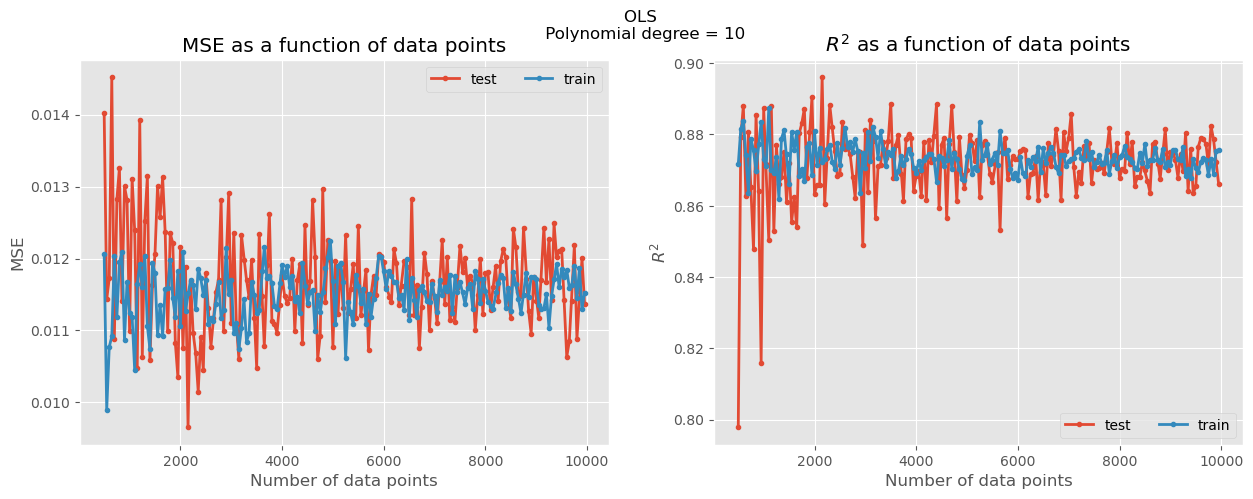

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(df_OLS_n_high['n'], df_OLS_n_high['MSE_test'], marker='o', markersize='3', linewidth='2', label='test')
ax[0].plot(df_OLS_n_high['n'], df_OLS_n_high['MSE_train'], marker='o', markersize='3', linewidth='2', label='train')


ax[0].set_title('MSE as a function of data points')
ax[0].legend(loc='upper right', ncol=2)
ax[0].set_xlabel('Number of data points')
ax[0].set_ylabel('MSE')

ax[1].plot(df_OLS_n_high['n'], df_OLS_n_high['R2_test'], marker='o', markersize='3', linewidth='2', label=f'test')
ax[1].plot(df_OLS_n_high['n'], df_OLS_n_high['R2_train'], marker='o', markersize='3', linewidth='2', label=f'train')

ax[1].set_title(r'$R^2$ as a function of data points')
ax[1].legend(loc='lower right', ncol=2)
ax[1].set_xlabel('Number of data points')
ax[1].set_ylabel(r'$R^2$')

fig.suptitle(f'OLS \n Polynomial degree = {p}')